In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df_big = pd.read_csv('top500histories.csv', index_col=0)

In [93]:
df = pd.read_csv('top500.csv', index_col=0)

In [94]:
df_old = pd.read_csv('df1819', index_col=0)

In [164]:
teams = pd.read_csv('teams', index_col=0)

In [181]:
df_attackers = df[df['element_type'] >= 3]

In [182]:
df_defenders = df[df['element_type'] <= 2]

Steps:
Ask the following questions and look for the answers using code and plots:  
Can you count something interesting?  
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?  
Can you make a bar plot or a histogram?  
Can you compare two related quantities?  
Can you make a scatterplot?  
Can you make a time-series plot?  
Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?  
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?


In [229]:
df1 = df[['web_name', 'total_points', 'team']]
df1.head()

,web_name,total_points,team
id_,,,
215,De Bruyne,66,11
210,Agüero,61,11
192,Mané,59,10
11,Aubameyang,57,1
460,Abraham,56,6


In [230]:
def team_finder(code):
    return teams[teams['id'] == code]['short_name'].values[0]

In [231]:
df1['team_name'] = df1['team'].apply(team_finder)
del df1['team']

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [232]:
df2 = df_attackers[['web_name', 'total_points', 'team']]
df2['team_name'] = df2['team'].apply(team_finder)
del df2['team']

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [233]:
df3 = df_defenders[['web_name', 'total_points', 'team']]
df3['team_name'] = df3['team'].apply(team_finder)
del df3['team']

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


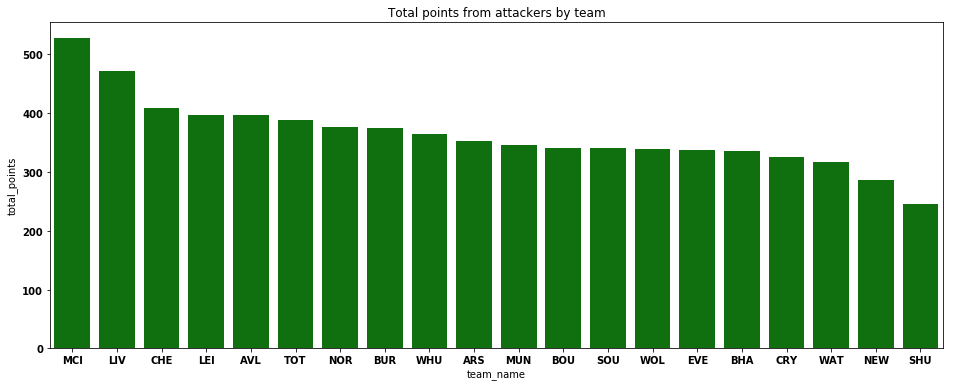

In [237]:
# stacked bar chart of pl teams with most fantasy points from attackers


team_points_A = df2.groupby('team_name').sum().sort_values('total_points', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=team_points_A.index, y='total_points', data=team_points, color='g')
plt.title('Total points from attackers by team')
plt.show()


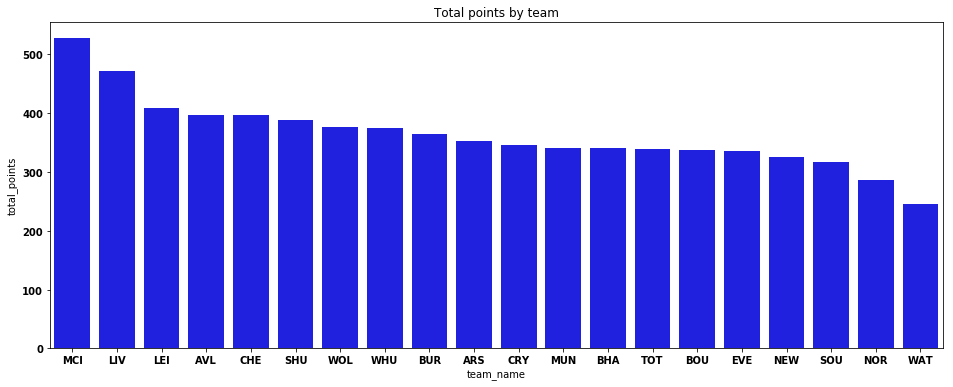

In [235]:
team_points = df1.groupby('team_name').sum().sort_values('total_points', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=team_points.index, y='total_points', data=team_points, color='b')
plt.title('Total points by team')
plt.show()

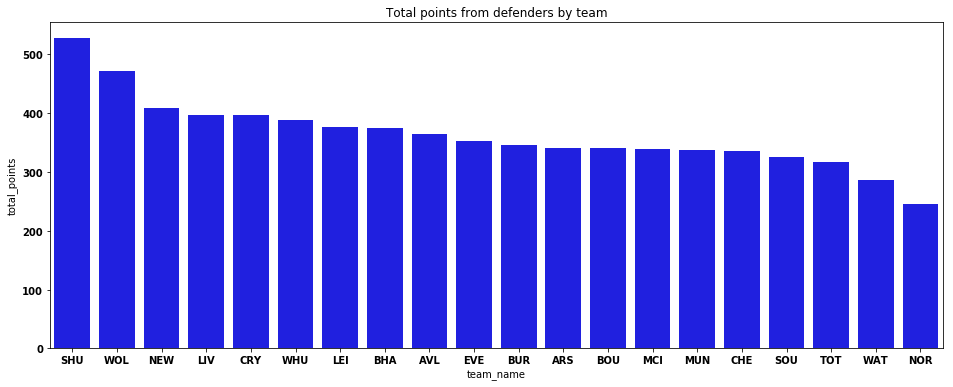

In [238]:
team_points_D = df3.groupby('team_name').sum().sort_values('total_points', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=team_points_D.index, y='total_points', data=team_points, color='b')
plt.title('Total points from defenders by team')
plt.show()

In [239]:
points_D = []
for team in team_points.index:
    points_D.append(team_points_D.loc[team].values[0])

In [240]:
points_A = []
for team in team_points.index:
    points_A.append(team_points_A.loc[team].values[0])

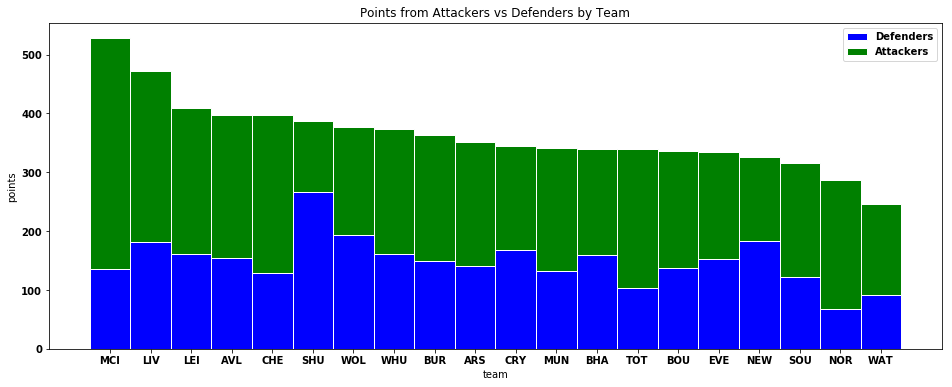

In [241]:
# https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = points_D
bars2 = points_A

player_type = ['Defenders', 'Attackers'] 

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [i for i in range(20)]
 
# Names of group and bar width
names = list(team_points.index)
barWidth = 1
plt.figure(figsize=(16, 6))

# Create blue bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='green', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("team")
plt.ylabel("points")
plt.title("Points from Attackers vs Defenders by Team")
plt.legend(player_type, loc=1)
# Show graphic
plt.show()


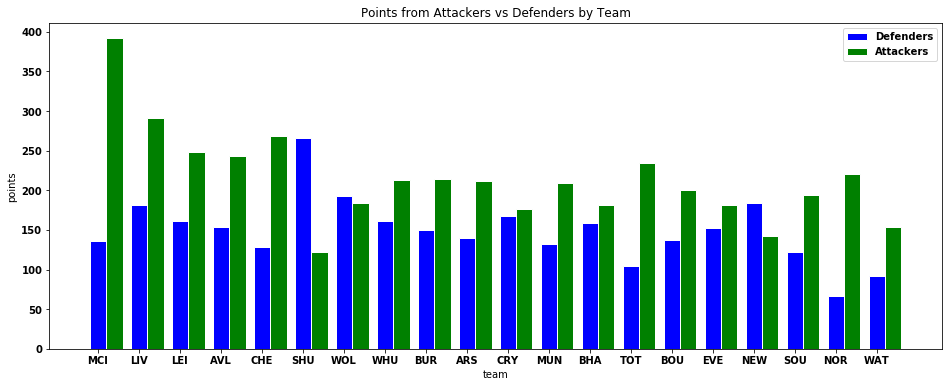

In [248]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = points_D
bars2 = points_A

player_type = ['Defenders', 'Attackers'] 

 
# The position of the bars on the x-axis
r = np.array([i for i in range(20)])
 
# Names of group and bar width
names = list(team_points.index)
barWidth = .4
plt.figure(figsize=(16, 6))

# Create blue bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r+barWidth, bars2, color='green', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("team")
plt.ylabel("points")
plt.title("Points from Attackers vs Defenders by Team")
plt.legend(player_type, loc=1)
# Show graphic
plt.show()


In [ ]:
# tree maps for city, liverpool, leicester 